# About the dataset

## Content

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

### Dataset

Adapted version of <a href = "https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia"> Paul Mooney's 'Chest X-Ray Images (Pneumonia)' dataset </a>, where the amount of observations for training and validation purposes was redistributed to allow for a more balanced machine learning exercise. <br>
<b> Total number of observations (images)</b> : 5,856 <br>
<b>Training observations</b> : 4,192 (1,082 normal cases, 3,110 lung opacity cases)<br>
<b>Validation observations</b> : 1,040 (267 normal cases, 773 lung opacity cases)<br>
<b>Testing observations</b> : 624 (234 normal cases, 390 lung opacity cases)<br>

You can download the dataset <a href = "https://www.kaggle.com/pcbreviglieri/pneumonia-xray-images">here</a>.

# Detecting Pneumonia from X-Rays using CNN

Building a CNN mainly involves 4 steps:

## 1. Convolution

When we as humans we see the world and process everything around us, we don't look at every single pixel of our surroundings, we just pick up the important features. This is exactly what this step does. It reduces the size of the image and keeps only the important features of it which would be neccessary to classify it.


<img src="https://sds-platform-private.s3-us-east-2.amazonaws.com/uploads/70_blog_image_3.png" />


We then apply the rectifier function. This is to increase non- linearity in the image.
Why do we want to increase non-linearity? The purpose of applying the rectifier function is to increase the non-linearity in our images. The reason we want to do that is that images are naturally non-linear. When you look at any image, you'll find it contains a lot of non-linear features (e.g. the transition between pixels, the borders, the colors, etc.). The rectifier serves to break up the linearity even further in order to make up for the linearity that we might impose an image when we put it through the convolution operation.

### 2.  Pooling

A pooling layer is another building block of a CNN. Its function is to progressively reduce the spatial size of the representation to reduce the amount of parameters and computation in the network. Pooling layer operates on each feature map independently. The most common approach used in pooling is max pooling which is what we'll also be doing.
Pooling not only helps in dimensionality reduction but also induces spatial invariance.
We have to make sure that our neural network has a property called spatial invariance meaning that it doesn't have to care if the features are a bit tilted, if the features are a bit closer of features or a bit further apart relative to relative to each other. So if the feature itself is a bit distorted our neural network has to have some level of flexibility to be able to still find that feature.
And that is what pooling is all about.

### 3. Flattening
After finishing the previous two steps, we're supposed to have a pooled feature map by now. As the name of this step implies, we are literally going to flatten our pooled feature map. What happens after the flattening step is that you end up with a long vector of input data that you then pass through the artificial neural network to have it processed further.

### 4.  Full connection
Finally, in Convolutional neural networks we're going to be using fully connected layers. Basically that vector of outputs that we have after the flattening is passed as the input to this.

These steps will be explained with more detail with respect to the case study below. 

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.
/Users/shreya/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shreya/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shreya/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shreya/opt/anaconda3/lib/python3.7

Text(0.5, 1.0, 'Pneumonia')

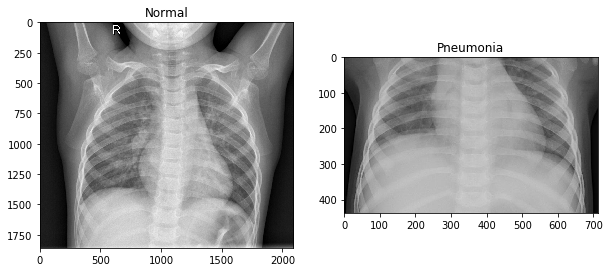

In [2]:
# Load the images
normal_xray = Image.open('/Users/shreya/Downloads/661308_1166777_bundle_archive/train/normal/IM-0115-0001.jpeg')
pneumonia_xray = Image.open('/Users/shreya/Downloads/661308_1166777_bundle_archive/train/opacity/person1_bacteria_1.jpeg')

f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(normal_xray, cmap='gray')
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(pneumonia_xray, cmap='gray')
a2.set_title('Pneumonia')

In [3]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


### Let's go through the above code step by step

#### Step 1 : Convolution
As explained above, step 1 is Convolution. Hence we've added a convolution layer using Conv2D. 2D because it's an image. <br>
Parameters: <br>
<b>32: </b> refers to the number of feature detectors we want. It's a common practice to start of with 32 hence we've done the same. <br>
<b>(3,3): </b> is the dimensions of the feature detector. 3x3 is a common dimension to use. <br>
<b> input_shape = (64,64,3): </b> means that the input image our CNN is going to be taking is of a 64x64 resolution and 3 stands for RGB, which is a color image <br>
<b> activation = relu: </b> activation function to make sure that we don't have any negative pixel values in our feature maps. We need to remove these negative pixels in order to have non-linearity in our convolutional neural network. Because of course classifying images is a nonlinear problem and so this rectify activation function is to make sure we get this nonlinearity.<br>

#### Step 2: Pooling
This step is easy it just consists of reducing the size of your feature maps. (2, 2) will halve the input in both spatial dimension. <br>
Why do we apply this step? <br>
It's because we want to reduce the number of nodes we'll get in the next step, i.e, the flattening step and then the full connection step because in these next steps basically what we'll get is all the cells of our future maps flattened into one huge one dimensional vector. So if we don't reduce the size of these feature maps well we'll get too large vector and therefore our model will be highly compute intensive. And we want to avoid that so we were playing this Max pulling step to reduce the size of our future maps and therefore reduce the number of nodes in the future fully connected layers. And that's why this will reduce the complexity and the time execution.<br>
Parameters: <br>
<b> pool_size = (2, 2) </b> : size of the window of maxpooling. 2x2 is what is take in general when we apply Max pooling on our feature map. <br>

To keep it simple, we're just adding three convolution layers so that we can reduce the complexity and time. <br>

#### Step 3: Flattening 
What we are basically doing here is taking the 2-D array, i.e pooled image pixels and converting them to a one-dimensional single vector. This would be the input to our fully connected layer.

#### Step 4: Full Connection
And this one final step that we have to do is add the fully connected layers.What they basically do is take out feature map of the image and make predictions about it. We got the set of nodes from the flattening step and these nodes will act as an input layer to these fully-connected layers. Dense is the function to add a fully connected layer, ‘units’ is where we define the number of nodes that should be present in this hidden layer.<br>
The final fully connected layer has <b> units = 1 </b> as this is a binary classification problem: pneumonia or not. Hence the activation function is sigmoid. If you have more than one class like maybe predicting whether it's dogs, cats or birds, you will have to use softmax instead. <br>

Finally, we can compile our cnn. loss = 'binary_crossentropy' because we have a binary outcome. We're using the most common metric, accuracy.

## Image augmentation
It basically consists of pre-processing your images to prevent overfitting. The idea is to alter the training data with small transformations to reproduce the variations. <br>
Keras supplies us ready to use image augmentation code which you can find here: https://keras.io/api/preprocessing/image/ . You can find it under Example of using .flow_from_directory(directory) <br>
Using the code from keras documentaion, we just altered the paramters so that it fits our model. All we changed is the directory to where our images are placed and target size as ours is 64x64. <br>

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  

training_set = train_datagen.flow_from_directory('/Users/shreya/Downloads/661308_1166777_bundle_archive/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

val_set = test_datagen.flow_from_directory('/Users/shreya/Downloads/661308_1166777_bundle_archive/val',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

test_set = test_datagen.flow_from_directory('/Users/shreya/Downloads/661308_1166777_bundle_archive/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle=False)

classifier.fit_generator(training_set,
                         steps_per_epoch = len(training_set),
                         epochs = 25,
                         validation_data = val_set,
                         validation_steps = len(val_set))

Found 4192 images belonging to 2 classes.
Found 1040 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Instructions for updating:
Use tf.cast instead.
Epoch 1/25
131/131 [==============================] - 117s 891ms/step - loss: 0.4492 - accuracy: 0.7972 - val_loss: 0.7206 - val_accuracy: 0.8221
Epoch 2/25
131/131 [==============================] - 110s 843ms/step - loss: 0.2508 - accuracy: 0.8929 - val_loss: 0.3620 - val_accuracy: 0.8644
Epoch 3/25
131/131 [==============================] - 97s 738ms/step - loss: 0.2148 - accuracy: 0.9101 - val_loss: 0.0926 - val_accuracy: 0.9231
Epoch 4/25
131/131 [==============================] - 94s 720ms/step - loss: 0.1931 - accuracy: 0.9232 - val_loss: 0.4613 - val_accuracy: 0.8058
Epoch 5/25
131/131 [==============================] - 97s 739ms/step - loss: 0.1784 - accuracy: 0.9263 - val_loss: 0.0646 - val_accuracy: 0.9394
Epoch 6/25
131/131 [==============================] - 96s 731ms/step - loss: 0.1670 - accuracy: 0.93

### We can see that our val_accuracy, i.e, our validation data's accuracy is 95% which is really good.

### Now trying to predict for images the model hasn't see yet, i.e, the test data

In [5]:
pred_probabilities = classifier.predict_generator(test_set)
predictions = pred_probabilities > 0.5
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.97      0.75      0.85       234
           1       0.87      0.99      0.92       390

    accuracy                           0.90       624
   macro avg       0.92      0.87      0.88       624
weighted avg       0.91      0.90      0.89       624



In [6]:
confusion_matrix(test_set.classes,predictions)

array([[175,  59],
       [  5, 385]])

### We can see that the accuracy for the test data is 175+385/624 = 89.7% 

Let's analyse our Confusion matrix

<b>Actual Normal, Predicted normal</b> : 175 <br>
<b>Actual Normal, Predicted Pneumonia </b> : 59 <br>
<b> Actual Pneumonia , Predicted Normal </b>: 5 <br>
<b> Actual Pneumonia, Predicted Pneumonia </b>: 385 <br>

It's good that the value for Actual Pnuemonia but predicting Normal is very low as high a value can cause a disastrous outcome in real life. That would essentially be telling a person that they don't have Pneumonia, when they actually do.